In [9]:
import pandas as pd

data = pd.read_csv('../sample_data/Salary_Data.csv')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [11]:
import numpy as np

x = data['YearsExperience'].values
y = data['Salary'].values
x = x[:,np.newaxis]

In [109]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

model = SVR(C=1000, gamma=0.05, kernel='rbf')
parameters= {
    'kernel': ['rbf'],
    'C': [1000, 10000, 100000],
    'gamma': [0.05, 0.005, 0.0005]
}

grid_search = GridSearchCV(model, parameters)

grid_search.fit(x,y)

print(grid_search.best_params_)

new_model = SVR(C=100000, gamma=0.005, kernel='rbf')
new_model.fit(x,y)

{'C': 100000, 'gamma': 0.005, 'kernel': 'rbf'}


SVR(C=100000, gamma=0.005)

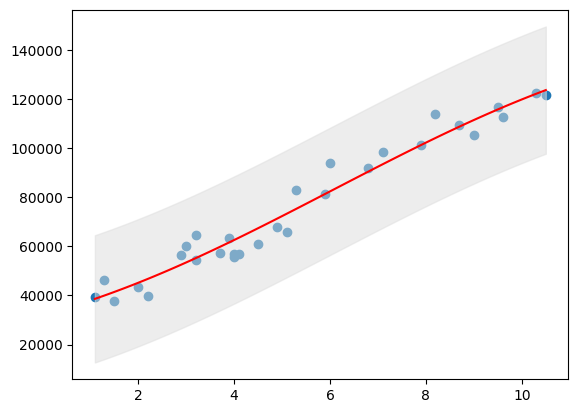

In [111]:
import matplotlib.pyplot as plt

xfit = np.linspace(x.min(), x.max(), 100)

plt.scatter(x,y)

plt.plot(xfit, new_model.predict(xfit[:,np.newaxis]), color='red')
plt.fill_between(xfit, new_model.predict(xfit[:,np.newaxis]) - new_model.predict(xfit[:,np.newaxis]).std(), new_model.predict(xfit[:,np.newaxis]) + new_model.predict(xfit[:,np.newaxis]).std(), color='#dddddd', alpha=0.5)

plt.show()

In [117]:
from sklearn.metrics import mean_absolute_error, r2_score

y_pred = new_model.predict(x)

print(r2_score(y, y_pred))


0.9610212564451518
